# MODULE 2

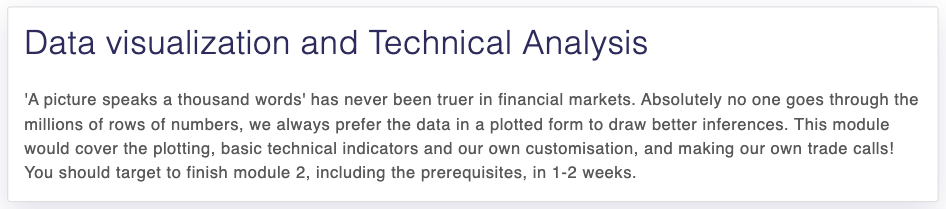

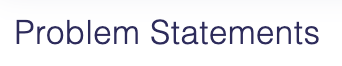

In [327]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1

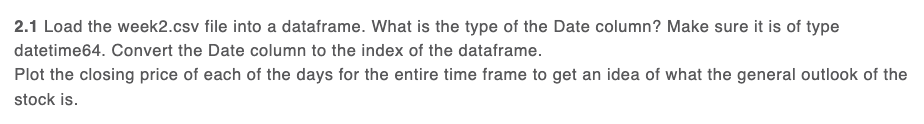

In [328]:
#importing the file
ds = pd.read_csv('week2.csv')

In [329]:
#top 5 datavalues
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend
0,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change
1,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change
2,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change
3,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change
4,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change


In [330]:
#checking for the default datatype of DATE column
ds['Date'].dtype

dtype('O')

In [331]:
#changing the datatype of DATE column
ds['Date']= pd.to_datetime(ds['Date']) 

In [332]:
#datatime datatype
ds['Date'].dtype

dtype('<M8[ns]')

In [333]:
#making the DATE column our index 
ds.index=ds['Date']

In [334]:
#renaming the Index column
ds.index.names = ['Index']

In [335]:
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend
Index,,,,,,,,,,,
2019-10-24,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change
2019-10-23,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change
2019-10-22,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change
2019-10-21,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change
2019-10-18,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change


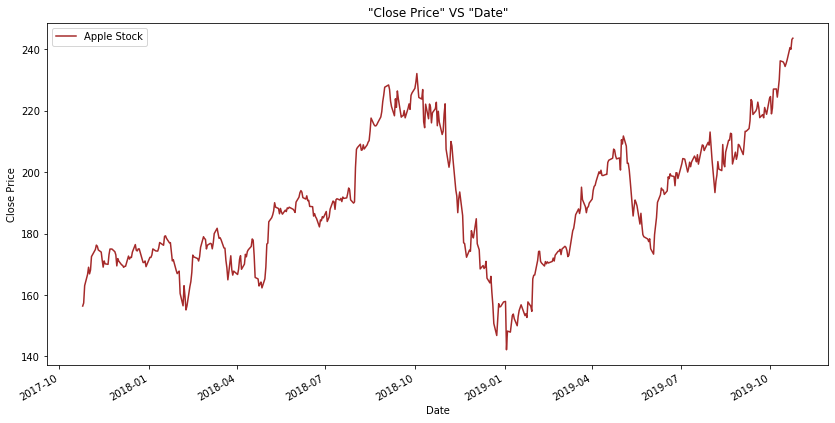

In [336]:
ds['Close Price'].plot(label='Apple Stock',figsize=(14,7),title='"Close Price" VS "Date"',color='brown')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

## 2.2

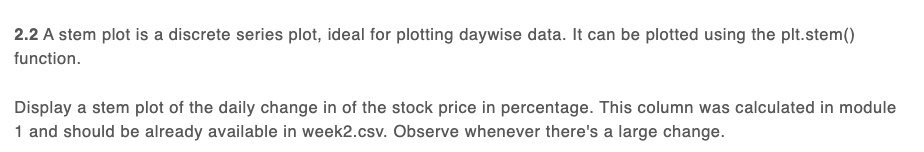

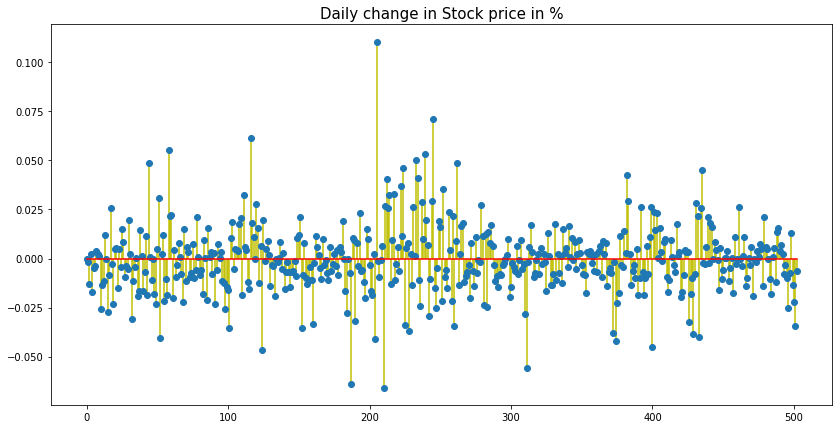

In [337]:
plt.figure(figsize=(14,7))
plt.stem(ds['Day_Perc_Change'], use_line_collection=True, linefmt='y-', basefmt='r-' )
plt.title('Daily change in Stock price in %',fontsize=15)
plt.show()

## 2.3

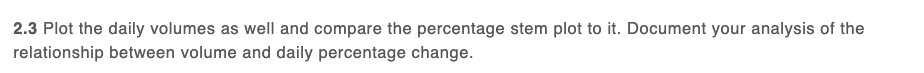

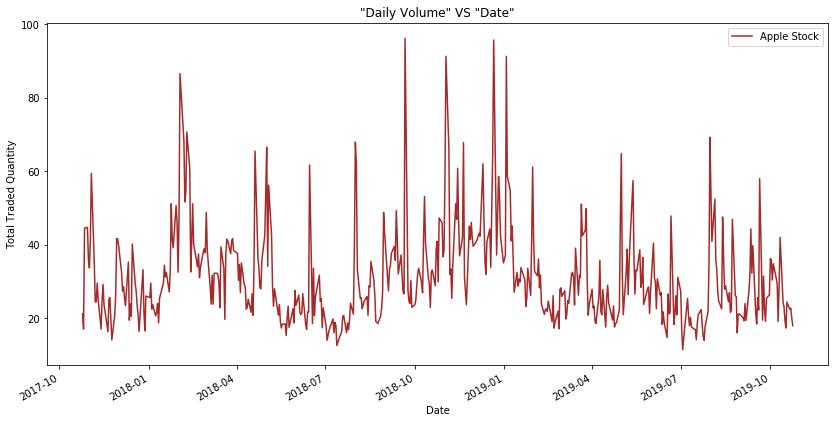

In [338]:
ds['Total Traded Quantity'].plot(label='Apple Stock',figsize=(14,7),title='"Daily Volume" VS "Date"',color='brown')
plt.xlabel('Date')
plt.ylabel('Total Traded Quantity')
plt.legend()

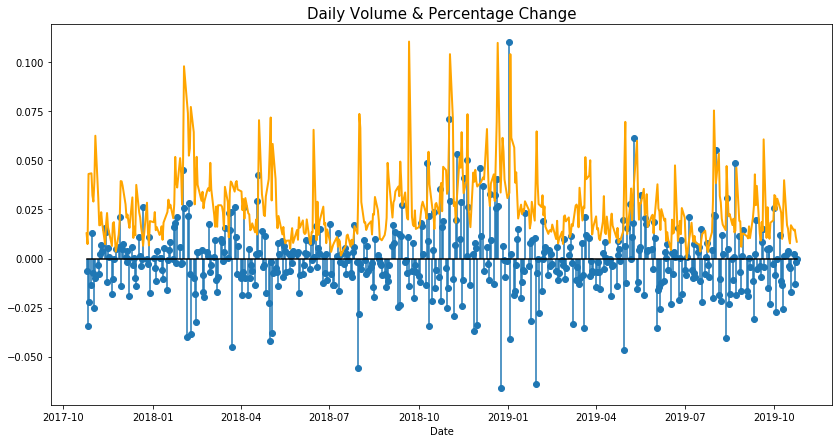

In [339]:
#Scaling of TOTAL TRADED QUANTITY to the Percentage Change so as to compare the two plots
scaledvalue =  ds["Total Traded Quantity"] - ds["Total Traded Quantity"].min()
scaledvalue = scaledvalue/scaledvalue.max() * ds.Day_Perc_Change.max()

plt.figure(figsize=(14,7))
plt.stem(ds.index, ds.Day_Perc_Change , basefmt='k-', label='Percentage Change',use_line_collection=True)
plt.plot(ds.index, scaledvalue, color='orange', label='Volume',linewidth=2)
plt.xlabel('Date')
plt.title('Daily Volume & Percentage Change',fontsize=15)
plt.show()

### Documentation
As Day_Perc_Change increase volume of stocks traded also increases.
We can say this by seeing that almost all +ve hills of Day_Perc_Change, volume also has a +ve value which reach heights more than that of others.
Therefore we can conclude both are directly proportional.

### Conclusion
Whenever the Day_Perc_Change increases our Total Traded Quantity also also increases by almost th same amount.
As Day_Perc_change % depends upon the Close Price of each day therefore Close Price play a major role in the increase of the trade volume.

## 2.4

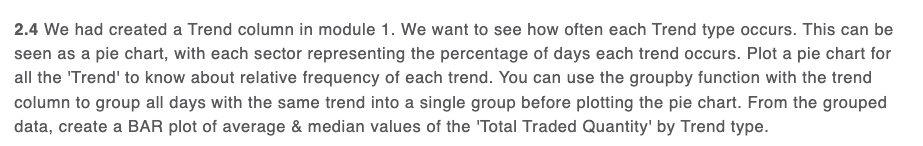

In [340]:
#grouping all the dates trendwise
pie_p= ds.groupby(['Trend'])["Date"].count()
pie_p

Trend
Slight or No Change    503
Name: Date, dtype: int64

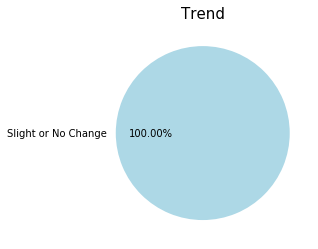

In [341]:
label=['Slight or No Change']
color=['lightblue']
plt.pie(pie_p, autopct='%1.2f%%',labels=label,colors=color)
plt.title('Trend',fontsize=15)
plt.show()

In [342]:
#Average and Median of the Total Traded Quantity for the Trendwise grouping
bar_p=ds.groupby(['Trend']).agg({'Total Traded Quantity' : ['mean','median']})
bar_p

Total Traded Quantity       
                                     mean median
Trend                                           
Slight or No Change              31.27334  27.96

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25bc3550>,
      dtype=object)

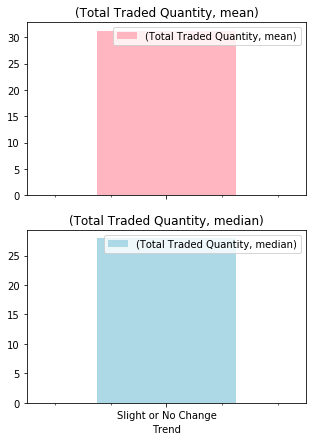

In [343]:
bar_p.plot.bar(rot=0, subplots=True,figsize=(5,7),color=('lightpink','lightblue'))

## 2.5

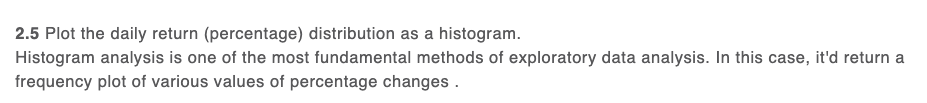

In [344]:
# % change 
ds['Daily_return']=(((ds['Close Price']-ds['Open Price'])/ds['Open Price'])*100)
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend,Daily_return
Index,,,,,,,,,,,,
2019-10-24,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change,-0.441429
2019-10-23,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change,0.446097
2019-10-22,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change,-0.497595
2019-10-21,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change,1.258841
2019-10-18,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change,0.775822


Text(0.5, 1.0, 'Daily return %')

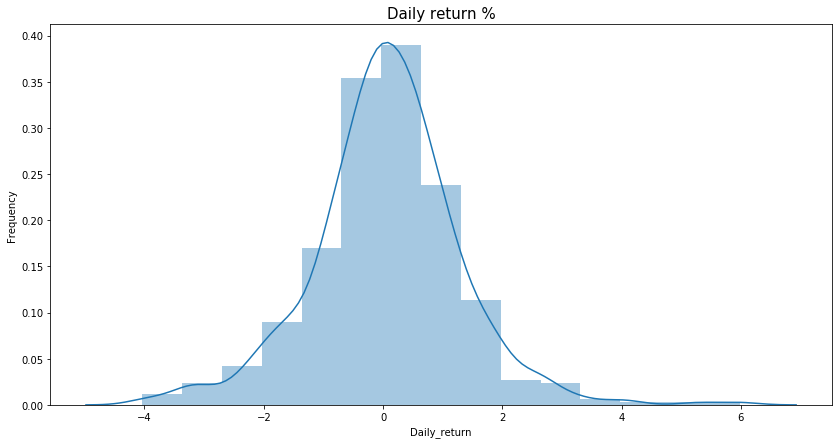

In [345]:
plt.figure(figsize=(14,7))
sns.distplot(ds['Daily_return'],bins=15)
plt.ylabel("Frequency")
plt.title('Daily return %',fontsize=15)

## 2.6

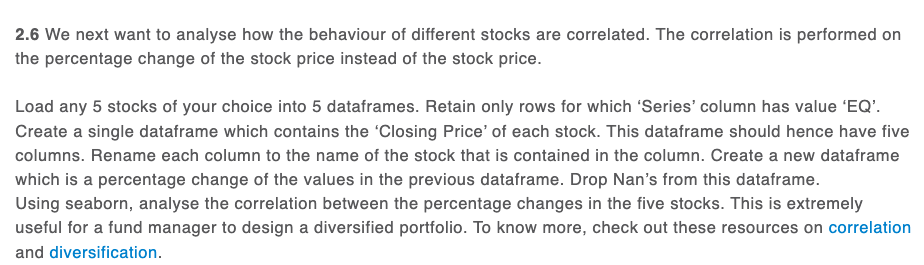

In [346]:
#Importing the 5 files {FORTIS, JETAIRWAYS, LEMONTREE, PVR, RAYMOND} 
#Removing all the rows in which [Series]!='EQ'

In [347]:
ds1 = pd.read_csv('FORTIS.csv')

In [348]:
ds1.shape

(495, 15)

In [349]:
ds1.drop(ds1[ds1.Series != 'EQ'].index, inplace = True)

In [350]:
ds1.shape

(494, 15)

In [351]:
ds2 = pd.read_csv('JETAIRWAYS.csv')

In [352]:
ds2.shape

(494, 15)

In [353]:
ds2.drop(ds2[ds2.Series != 'EQ'].index, inplace = True)

In [354]:
ds2.shape

(494, 15)

In [355]:
ds2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,15-May-2017,519.45,520.00,533.40,517.10,527.8,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,16-May-2017,527.50,527.00,536.50,524.65,534.0,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,17-May-2017,534.15,532.00,534.75,526.20,530.0,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,18-May-2017,528.90,525.15,538.60,517.50,517.7,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,19-May-2017,522.70,525.60,532.90,517.45,521.0,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19


In [356]:
ds3 = pd.read_csv('LEMONTREE.csv')

In [357]:
ds3.shape

(270, 15)

In [358]:
ds3.drop(ds3[ds3.Series != 'EQ'].index, inplace = True)

In [359]:
ds3.shape

(270, 15)

In [360]:
ds3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LEMONTREE,EQ,09-Apr-2018,56.00,61.60,73.9,57.25,72.30,71.65,65.59,67619635,4.434900e+09,263630,13918070,20.58
1,LEMONTREE,EQ,10-Apr-2018,71.65,69.85,71.5,65.40,66.50,66.85,68.42,15217104,1.041159e+09,87183,3186294,20.94
2,LEMONTREE,EQ,11-Apr-2018,66.85,67.25,69.7,66.05,66.95,66.95,67.69,9094509,6.156216e+08,44895,2323539,25.55
3,LEMONTREE,EQ,12-Apr-2018,66.95,67.10,67.7,65.10,66.50,66.40,66.44,2408408,1.600220e+08,14777,681080,28.28
4,LEMONTREE,EQ,13-Apr-2018,66.40,66.70,68.2,66.50,67.60,67.70,67.56,2406014,1.625400e+08,20955,994028,41.31


In [361]:
ds4 = pd.read_csv('PVR.csv')

In [362]:
ds4.shape

(495, 15)

In [363]:
ds4.drop(ds4[ds4.Series != 'EQ'].index, inplace = True)

In [364]:
ds4.shape

(494, 15)

In [365]:
ds4.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [366]:
ds5 = pd.read_csv('RAYMOND.csv')

In [367]:
ds5.shape

(494, 15)

In [368]:
ds5.drop(ds5[ds5.Series != 'EQ'].index, inplace = True)

In [369]:
ds5.shape

(494, 15)

In [370]:
ds5.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


In [371]:
#Creating a new dataframe
newDS=pd.DataFrame()

In [372]:
newDS

""


In [373]:
#adding the 'Close price' of all the 5 imported datasets to the new dataframe newDS
newDS['Close_Price_FORTIS'] = ds1['Close Price']
newDS['Close_Price_JETAIRWAYS'] = ds2['Close Price']
newDS['Close_Price_LEMONTREE'] = ds3['Close Price']
newDS['Close_Price_PVR'] = ds4['Close Price']
newDS['Close_Price_RAYMOND'] = ds5['Close Price']

In [374]:
newDS

,Close_Price_FORTIS,Close_Price_JETAIRWAYS,Close_Price_LEMONTREE,Close_Price_PVR,Close_Price_RAYMOND
0,205.25,527.50,71.65,1524.95,772.80
1,207.90,534.15,66.85,1539.00,785.00
2,205.90,528.90,66.95,1530.30,783.65
3,196.85,522.70,66.40,1515.05,746.95
4,203.55,520.40,67.70,1513.55,723.10
...,...,...,...,...,...
490,135.20,131.35,NaN,1780.10,807.10
491,133.60,147.40,NaN,1748.50,805.30
492,133.00,151.75,NaN,1758.45,804.40
493,131.90,139.10,NaN,1715.40,779.35


In [375]:
#Creating a new dataframe
newDS2=pd.DataFrame()

In [376]:
#adding Percentage change of 'Close Price' for all the stocks in new dataframe
newDS2['FORTIS']=newDS['Close_Price_FORTIS'].pct_change()
newDS2['JETAIRWAYS']=newDS['Close_Price_JETAIRWAYS'].pct_change()
newDS2['LEMONTREE']=newDS['Close_Price_LEMONTREE'].pct_change()
newDS2['PVR']=newDS['Close_Price_PVR'].pct_change()
newDS2['RAYMOND']=newDS['Close_Price_RAYMOND'].pct_change()

In [377]:
newDS2.head()

,FORTIS,JETAIRWAYS,LEMONTREE,PVR,RAYMOND
0,NaN,NaN,NaN,NaN,NaN
1,0.012911,0.012607,-0.066992,0.009213,0.015787
2,-0.009620,-0.009829,0.001496,-0.005653,-0.001720
3,-0.043953,-0.011722,-0.008215,-0.009965,-0.046832
4,0.034036,-0.004400,0.019578,-0.000990,-0.031930


In [378]:
#dropping all the Nan values
newDS2.dropna(inplace=True)

In [379]:
newDS2.head()

,FORTIS,JETAIRWAYS,LEMONTREE,PVR,RAYMOND
1,0.012911,0.012607,-0.066992,0.009213,0.015787
2,-0.009620,-0.009829,0.001496,-0.005653,-0.001720
3,-0.043953,-0.011722,-0.008215,-0.009965,-0.046832
4,0.034036,-0.004400,0.019578,-0.000990,-0.031930
5,-0.042987,-0.085992,-0.006647,-0.021506,-0.009888


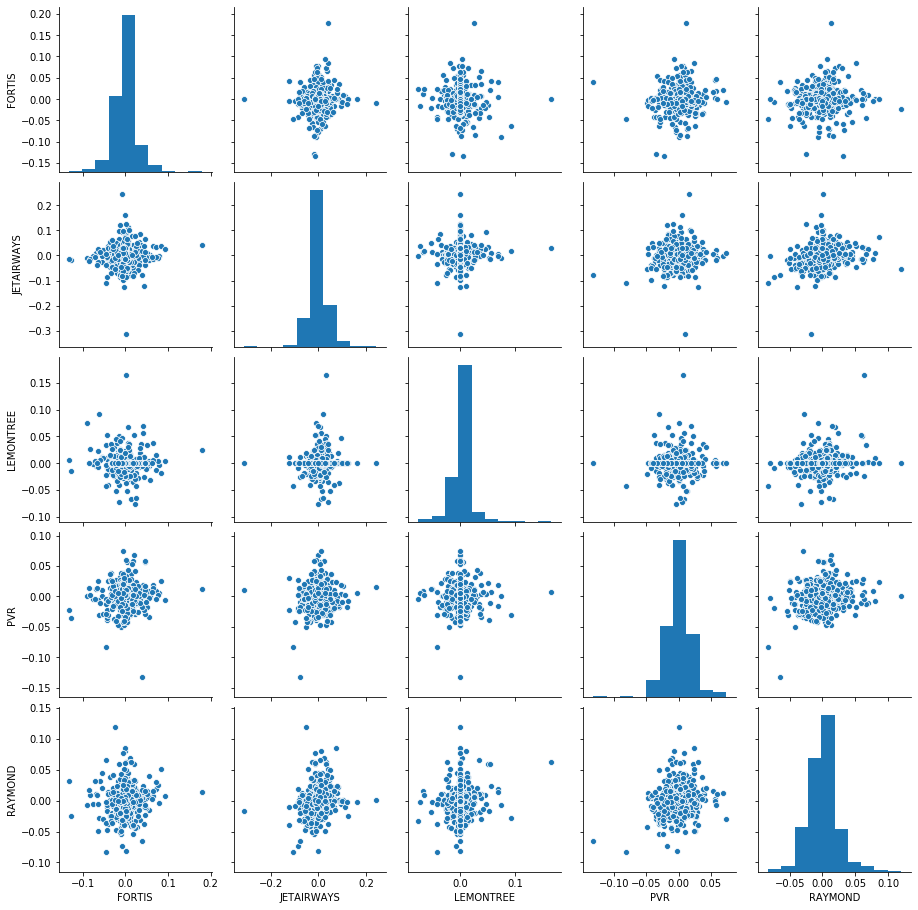

In [380]:
sns.pairplot(newDS2)

## 2.7

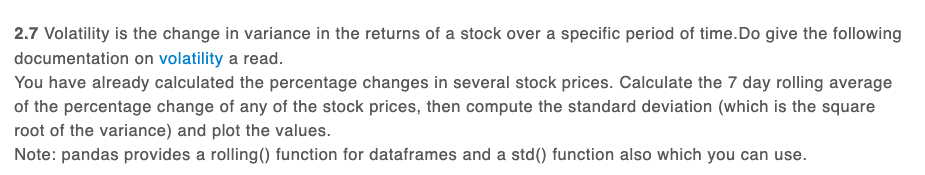

In [381]:
#7 day Rolling average of the percentage change of PVR stock
rm=newDS2['PVR'].rolling(7).mean()
newDS2.PVR.std()

0.019534844134073286

Text(0.5, 1.0, 'Volatility')

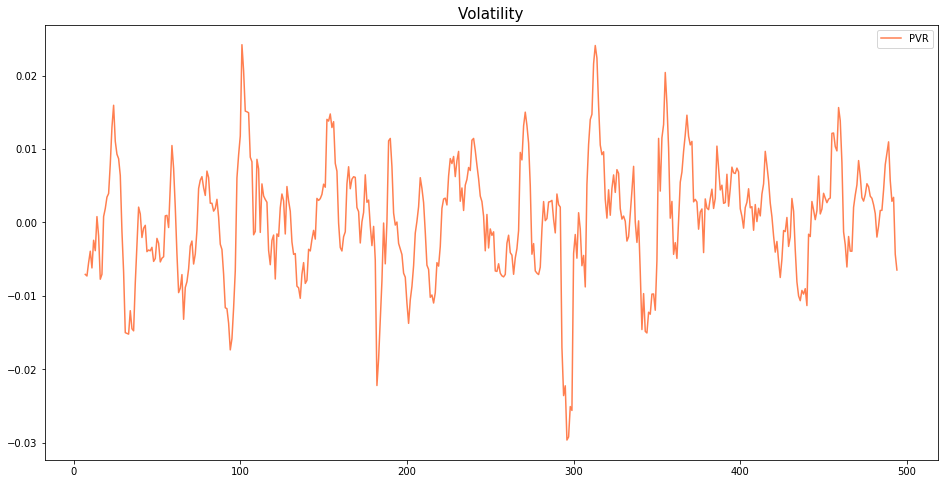

In [382]:
plt.figure(figsize=(16,8))
plt.plot(rm,label='PVR',color='coral')
plt.legend()
plt.title('Volatility',fontsize=15)

## 2.8

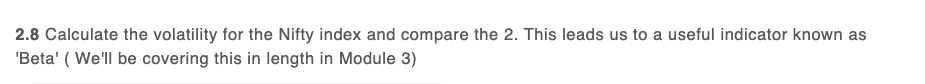

In [383]:
#importing the NIFTY stock
ds6 = pd.read_csv('Nifty50.csv')

In [384]:
ds6.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [385]:
#Adding NIFTY to the newDS dataframe with the other Stocks
newDS2['NIFTY']=newDS['Close_Price_FORTIS'].pct_change()

In [386]:
newDS2.head()

,FORTIS,JETAIRWAYS,LEMONTREE,PVR,RAYMOND,NIFTY
1,0.012911,0.012607,-0.066992,0.009213,0.015787,0.012911
2,-0.009620,-0.009829,0.001496,-0.005653,-0.001720,-0.009620
3,-0.043953,-0.011722,-0.008215,-0.009965,-0.046832,-0.043953
4,0.034036,-0.004400,0.019578,-0.000990,-0.031930,0.034036
5,-0.042987,-0.085992,-0.006647,-0.021506,-0.009888,-0.042987


In [387]:
#7 day Rolling average of the percentage change of NIFTY stock
rm2=newDS2['NIFTY'].rolling(7).mean()
newDS2.NIFTY.std()

0.026536281966059345

In [388]:
#7 day Rolling average of the percentage change of LEMONTREE stock
rm3=newDS2['LEMONTREE'].rolling(7).mean()
newDS2.LEMONTREE.std()

0.01824200461351243

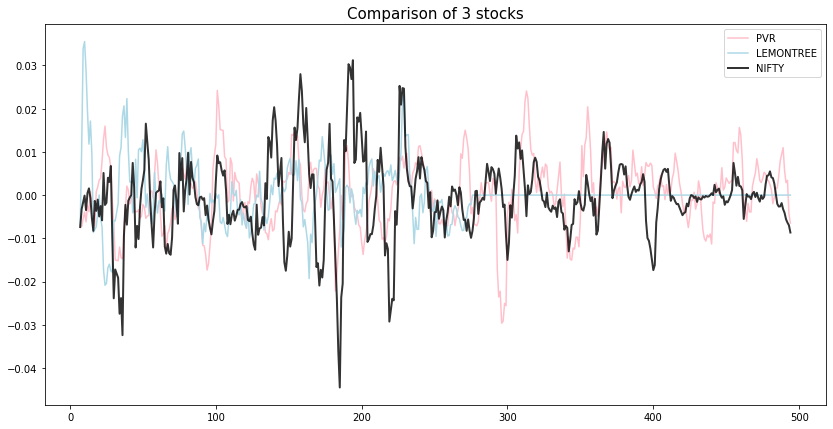

In [389]:
plt.figure(figsize=(14,7))
plt.plot(rm, color='pink',alpha =2,label='PVR')
plt.plot(rm3, color='lightblue',alpha =2, label='LEMONTREE')
plt.plot(rm2, color='black',linewidth=2,alpha =0.8,label='NIFTY')
plt.title('Comparison of 3 stocks',fontsize=15)
plt.legend()

## 2.9

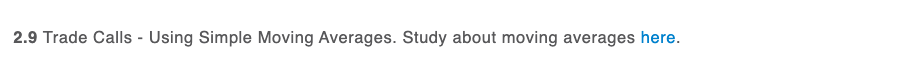

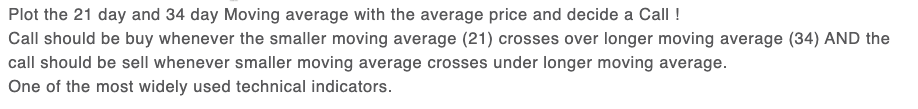

In [390]:
#creating a new dataframe
signals=pd.DataFrame(index=ds.index)
signals['signal']=0.0

#SMA of 21 Day
signals['mov_avg21']=ds['Close Price'].rolling(21, min_periods=1,center=False).mean()
#SMA of 34 day
signals['mov_avg34']=ds['Close Price'].rolling(34, min_periods=1,center=False).mean()

In [391]:
signals['signal'][21:]=np.where(signals['mov_avg21'][21:]>signals['mov_avg34'][21:],1.0,0.0)
signals['positions']=signals['signal'].diff()
signals.head()

,signal,mov_avg21,mov_avg34,positions
Index,,,,
2019-10-24,0.0,243.5800,243.5800,NaN
2019-10-23,0.0,243.3800,243.3800,0.0
2019-10-22,0.0,242.2400,242.2400,0.0
2019-10-21,0.0,241.8075,241.8075,0.0
2019-10-18,0.0,240.7280,240.7280,0.0


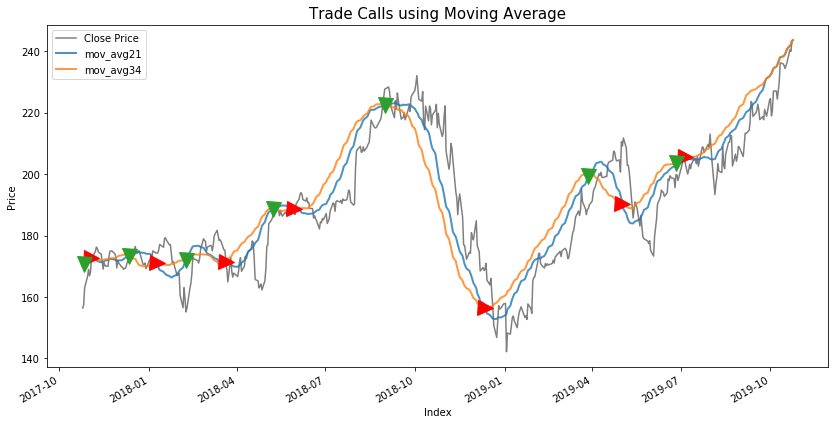

In [392]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(ylabel='Price')

ds['Close Price'].plot(ax=ax1, color='black',linewidth=1.5,alpha =0.5)
signals[['mov_avg21', 'mov_avg34']].plot(ax=ax1,linewidth=2,alpha =0.8)

#the buy signals marker
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.mov_avg21[signals.positions == 1.0], '>' , markersize=15,color='r')
#the sell signals marker
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.mov_avg21[signals.positions == -1.0], 'v' , markersize=15)
plt.title('Trade Calls using Moving Average',fontsize=15)
plt.legend()
plt.show()

##### Red Triangle - call for buy
##### Green Triangle - call for sell

## 2.10

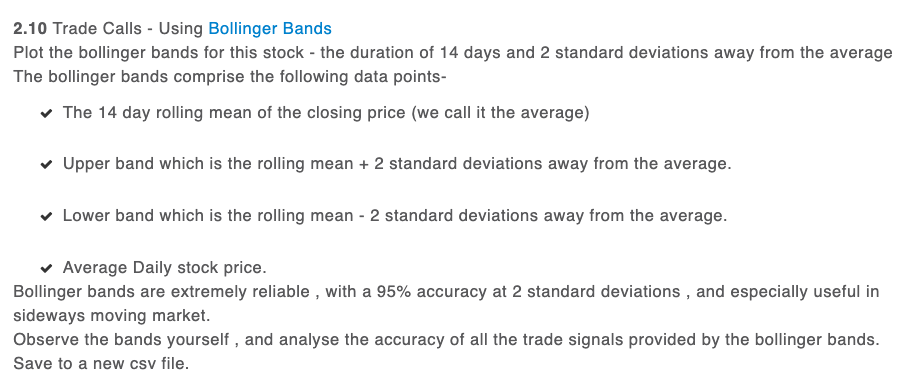

In [393]:
#rolling mean for the duration of 14 days of APPLE Stock
sma = ds['Close Price'].rolling(14).mean()
rstd = ds['Close Price'].rolling(14).std()

In [394]:
upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

In [395]:
#new dataframe
bands=pd.DataFrame()
#upper band values
bands['Upper Band']=upper_band
#lower band values
bands['Lower Band']=lower_band
#rolling mean
bands['Rolling Mean']=sma
#daily average of stock price
bands['Daily Average']=(ds['Close Price']+ds['Open Price'])/2

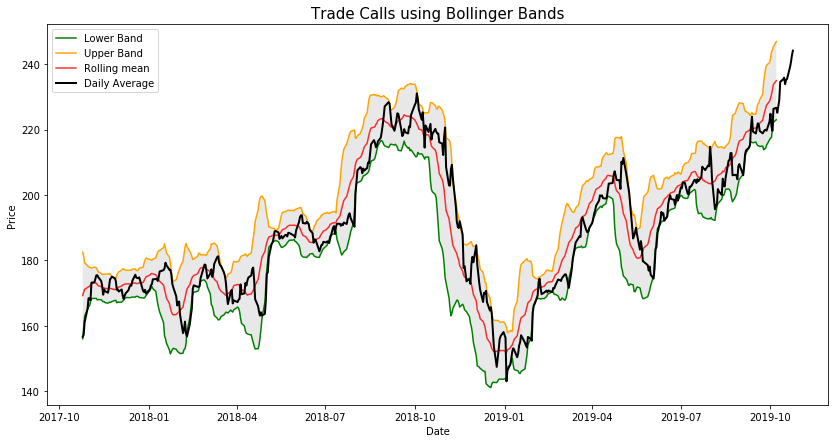

In [396]:
plt.figure(figsize=(14,7))
plt.plot(bands['Lower Band'], label='Lower Band', color='green',alpha =1)
plt.plot(bands['Upper Band'], label='Upper Band', color='orange',alpha =1)
plt.plot(bands['Rolling Mean'], label='Rolling mean', color='red',alpha =0.8)
plt.plot(bands['Daily Average'], label='Daily Average', color='black',linewidth=2)
plt.fill_between(ds.index, bands['Lower Band'], bands['Upper Band'], alpha='0.5',facecolor ='lightgrey')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trade Calls using Bollinger Bands',fontsize=15)
plt.legend()
plt.show()

In [397]:
ds

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend,Daily_return
Index,,,,,,,,,,,,
2019-10-24,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change,-0.441429
2019-10-23,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change,0.446097
2019-10-22,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change,-0.497595
2019-10-21,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change,1.258841
2019-10-18,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change,0.775822
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,2017-10-31,169.04,167.90,169.65,166.94,36.05,10,2017,169.04,0.012883,Slight or No Change,0.678976
2017-10-30,2017-10-30,166.72,163.89,168.07,163.72,44.70,10,2017,166.72,-0.013725,Slight or No Change,1.726768
2017-10-27,2017-10-27,163.05,159.29,163.60,158.70,44.45,10,2017,163.05,-0.022013,Slight or No Change,2.360475


In [398]:
bands

,Upper Band,Lower Band,Rolling Mean,Daily Average
Index,,,,
2019-10-24,NaN,NaN,NaN,244.120
2019-10-23,NaN,NaN,NaN,242.640
2019-10-22,NaN,NaN,NaN,240.560
2019-10-21,NaN,NaN,NaN,239.015
2019-10-18,NaN,NaN,NaN,235.500
...,...,...,...,...
2017-10-31,178.089978,165.914308,172.002143,168.470
2017-10-30,178.415414,165.098871,171.757143,165.305
2017-10-27,179.312516,163.051770,171.182143,161.170


In [399]:
ds['Upper Band']= bands['Upper Band']
ds['Lower Band']= bands['Lower Band']
ds['Mid Band']=(bands['Upper Band']+bands['Lower Band'])/2

In [400]:
ds

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend,Daily_return,Upper Band,Lower Band,Mid Band
Index,,,,,,,,,,,,,,,
2019-10-24,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change,-0.441429,NaN,NaN,NaN
2019-10-23,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change,0.446097,NaN,NaN,NaN
2019-10-22,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change,-0.497595,NaN,NaN,NaN
2019-10-21,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change,1.258841,NaN,NaN,NaN
2019-10-18,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change,0.775822,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,2017-10-31,169.04,167.90,169.65,166.94,36.05,10,2017,169.04,0.012883,Slight or No Change,0.678976,178.089978,165.914308,172.002143
2017-10-30,2017-10-30,166.72,163.89,168.07,163.72,44.70,10,2017,166.72,-0.013725,Slight or No Change,1.726768,178.415414,165.098871,171.757143
2017-10-27,2017-10-27,163.05,159.29,163.60,158.70,44.45,10,2017,163.05,-0.022013,Slight or No Change,2.360475,179.312516,163.051770,171.182143


In [401]:
ds.to_csv('m2.1.csv')

In [402]:
newDS.to_csv('m2.2.csv')

In [403]:
newDS2.to_csv('m2.3.csv')

In [404]:
ds.to_csv('AppleUpdated.csv')

# Thank You !